<a href="https://colab.research.google.com/github/pierredevillers/DMML2022_Coop/blob/main/Classic_models/Project_Coop_2022_ClassicModels_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Data Mining and Machine Learning

## Detecting Difficulty Level of French Texts



 # 2 Data Cleaning - Classic Models

# 3 Loading data into  notebook with the Kaggle API 


In [ ]:
# reading in the data via the Kaggle API

# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# install Kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Log into your Kaggle account, go to Account > API > Create new API token. You will obtain a kaggle.json file, which you save on your Google Drive directy in my drive.

In [ ]:
#Vanja
!mkdir train

mkdir: cannot create directory ‘train’: File exists


In [ ]:
# Pierre
#!mkdir ~/.kaggle

In [ ]:
#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/Colab_Notebooks/kaggle.json ~/.kaggle/kaggle.json


In [ ]:
# download the dataset from the competition page
! kaggle competitions download -c detecting-french-texts-difficulty-level-2022

  0% 0.00/303k [00:00<?, ?B/s]
100% 303k/303k [00:00<00:00, 103MB/s]


In [ ]:
# from zipfile import ZipFile
# import zipfile

# pd.read_csv(zip_file.open("training_data.csv"))


In [ ]:
! unzip detecting-french-texts-difficulty-level-2022.zip -d train

Archive:  detecting-french-texts-difficulty-level-2022.zip
  inflating: train/sample_submission.csv  
  inflating: train/training_data.csv  
  inflating: train/unlabelled_test_data.csv  


###3.1 Import of packages 

In [ ]:
# Import required packages

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set_style("whitegrid")

# import some additional packages
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier, Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
# read in your training data

import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/pierredevillers/DMML2022_Coop/main/CSV_files/training_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import functions 

In [ ]:
from functions import *

In [ ]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [ ]:
df.difficulty.value_counts()

A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: difficulty, dtype: int64

In [ ]:
df.isnull().sum()

id            0
sentence      0
difficulty    0
dtype: int64

Have a look at the data on which to make predictions.

In [ ]:
df_pred = pd.read_csv('https://raw.githubusercontent.com/pierredevillers/DMML2022_Coop/main/CSV_files/training_data.csv')

#4 Prepare your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

### 4.1.Baseline
What is the baseline for this classification problem?
> Base Rate = (most frequent class) / (total observations)

In [ ]:
df.difficulty.value_counts()

A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: difficulty, dtype: int64

In [ ]:
base_rate = np.max(df.difficulty.value_counts()/df.difficulty.shape[0]) 
# Good if the base rate is arount 0.1666
print(f"Base rate:\n{base_rate:.4f}")

Base rate:
0.1694


### 4.2 Encode column  

In [ ]:
# import some additional packages
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

#Use Label Encoder for the level 
oe=OrdinalEncoder()
# set the order of your categories
oe.set_params(categories= [[ 'A1', 'A2', 'B1', 'B2', 'C1', 'C2']])

# fit-transform a dataframe of the categorical age variable
oe_difficulty = oe.fit_transform(df[['difficulty']])

df['oe_difficulty'] = pd.DataFrame(oe_difficulty).astype('int')
df.oe_difficulty.value_counts()

0    813
5    807
4    798
2    795
1    795
3    792
Name: oe_difficulty, dtype: int64

In [ ]:
oe_difficulty = pd.DataFrame(oe_difficulty, columns=['oe_difficulty']).astype('int')
oe_difficulty.value_counts()

oe_difficulty
0                813
5                807
4                798
1                795
2                795
3                792
dtype: int64

In [ ]:
df.head()

,id,sentence,difficulty,oe_difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1,4
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1,0
2,2,Le test de niveau en français est sur le site ...,A1,0
3,3,Est-ce que ton mari est aussi de Boston?,A1,0
4,4,"Dans les écoles de commerce, dans les couloirs...",B1,2


### 4.3 Prepare the Data

In [ ]:
%%capture
!pip install -U spacy

In [ ]:
%%capture
!python -m spacy download fr_core_news_sm

In [ ]:
%%capture
!python -m spacy download fr

In [ ]:
%%capture
!pip install transformers

###4.4 Different tokanizer

####4.4.1 Spacy tokanizer

In [ ]:
import spacy
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Load french language model
sp = spacy.load('fr_core_news_sm')

# Create tokenizer function
def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)
    

    #  Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]

    # Remove stop words and punctuation
    # mytokens = [ word for word in mytokens if word not in punctuations ]

    # Return preprocessed list of tokens
    return mytokens

# Example
review = df["sentence"].sample()
review

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


3961    On y met des coussins et on peut parfois l'uti...
Name: sentence, dtype: object

REMARK: With deleting the stopwords and/or the punctuation the accuracy score become worse, for that reason here both are commentet out. 

####4.4.2 NLTK Tokanizer

In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
import re

In [ ]:
# import nltk
# nltk.download()


####4.4.3 GPT2 Tokanizer 

In [ ]:
from transformers import GPT2Tokenizer

In [ ]:
# Load french language model
sp = spacy.load('fr_core_news_sm')

# Create tokenizer function
def gpt2_tokenizer(sentence):
    punctuations = string.punctuation
    # Get model's tokenizer.
    mytokens = GPT2Tokenizer.from_pretrained(sentence)
    

    # default to left padding
    mytokens.padding_side = "left"
    # Define PAD Token = EOS Token = 50256
    mytokens.pad_token = mytokens.eos_toke

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in punctuations ]
    # Remove anonymous dates and people
    mytokens = [ word.replace('..', '').replace('xxxx/', '').replace('xx', '') for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in ["xxxx", "xx", ""] ]

    # Return preprocessed list of tokens
    return mytokens

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer_gpt2 = AutoTokenizer.from_pretrained("dbddv01/gpt2-french-small")
# default to left padding
tokenizer_gpt2.padding_side = "right"
# Define PAD Token = EOS Token = 50256
tokenizer_gpt2.pad_token = tokenizer_gpt2.eos_token

Downloading:   0%|          | 0.00/611 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/842 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/858k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/517k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/387 [00:00<?, ?B/s]

###4.4 Definitions

Definitions of Evaluation and Confusion Martrix

###4.6 Give X and Y a value


In [ ]:
#Give X and Y value
y = df.oe_difficulty
X = df.sentence
X.head()

0    Les coûts kilométriques réels peuvent diverger...
1    Le bleu, c'est ma couleur préférée mais je n'a...
2    Le test de niveau en français est sur le site ...
3             Est-ce que ton mari est aussi de Boston?
4    Dans les écoles de commerce, dans les couloirs...
Name: sentence, dtype: object

###4.7 Train/test splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train

70                                Comment t'appelles-tu ?
4347    Voilà qui serait en effet de nature à simplifi...
1122    Les pèlerins partagèrent alors cette célébrati...
4570                          Qu'est-ce que vous faites ?
34      En voici un des moins obscurs : "Plus nous dev...
                              ...                        
1033    Les micro-changements apportés par ce type d'u...
3264    J'allais à la poste quand j'ai croisé ma cousi...
1653    Au cours des années 1970 et 1980, plusieurs gr...
2607    Stop : tout d'abord, figurez-vous que les vrai...
2732    "On s'est alors dit que le terrain commençait ...
Name: sentence, Length: 3840, dtype: object

In [ ]:
y_train

70      0
4347    3
1122    4
4570    0
34      5
       ..
1033    3
3264    1
1653    4
2607    3
2732    2
Name: oe_difficulty, Length: 3840, dtype: int64

In [ ]:
y_train

70      0
4347    3
1122    4
4570    0
34      5
       ..
1033    3
3264    1
1653    4
2607    3
2732    2
Name: oe_difficulty, Length: 3840, dtype: int64

In [ ]:
###4.5 Preparing Dataframes for the Scores

In [ ]:
report = pd.DataFrame()
report.index = ['Accuracy Score', 'Precision Score','Recall Score', 'F1 Score']

In [ ]:
report_logreg = pd.DataFrame()
report_logreg.index = ['Accuracy Score', 'Precision Score','Recall Score', 'F1 Score']

#5 Classic Models (with spacy tokenizer)

In the section 5 the classic models (Logisitc Regression, RIDGE, KNN, Decision Tree  and Random Forest) will be tested on the spacy tokenizer. 

SPOILER ALERT: You will see that in the Random Forest and the Decision Tree the scores even become wors that without spacy tokenizer. 

### 5.1 Logistic Regression Model 

Train a simple logistic regression model using a Tfidf vectorizer.

In [ ]:
#Random state 0

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer (tokenizer=spacy_tokenizer)

logreg = LogisticRegression(solver = 'lbfgs', random_state=0, multi_class='multinomial')

pipe_logreg = Pipeline([('vectorizer', tfidf),
                 ('classifier', logreg)])

pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7f758115f550>)),
                ('classifier',
                 LogisticRegression(multi_class='multinomial',
                                    random_state=0))])

In [ ]:
y_pred_logreg = pipe_logreg.predict(X_test)

Calculation of accuracy, precision, recall and F1 score on the test set.



0.4771


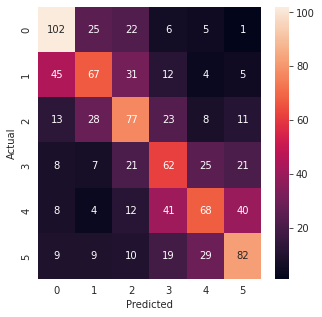

In [ ]:
report_logreg_pred=functions.evaluate(y_test, y_pred_logreg)
report_logreg_pred
functions.accuracy_conf_mat(y_test, y_pred_logreg)

In [ ]:
report['Logistic Regression ']=report_logreg_pred
report_logreg['Spacy Tokenizer']=report_logreg_pred

In [ ]:
report

,Logistic Regression
Accuracy Score,0.477083
Precision Score,0.476181
Recall Score,0.477656
F1 Score,0.474729


###5.2 RIDGE Model 


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train

70                                Comment t'appelles-tu ?
4347    Voilà qui serait en effet de nature à simplifi...
1122    Les pèlerins partagèrent alors cette célébrati...
4570                          Qu'est-ce que vous faites ?
34      En voici un des moins obscurs : "Plus nous dev...
                              ...                        
1033    Les micro-changements apportés par ce type d'u...
3264    J'allais à la poste quand j'ai croisé ma cousi...
1653    Au cours des années 1970 et 1980, plusieurs gr...
2607    Stop : tout d'abord, figurez-vous que les vrai...
2732    "On s'est alors dit que le terrain commençait ...
Name: sentence, Length: 3840, dtype: object

0.4646


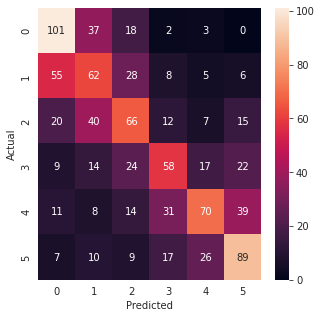

In [ ]:
#RIDGE Model 
ridge = RidgeClassifier()

pipe_ridge = Pipeline([('vectorizer', tfidf),('classifier', ridge)])

#Train X and Y
pipe_ridge.fit(X_train, y_train)

#Predicition
y_pred_ridge = pipe_ridge.predict(X_test)

report_ridge_pred=functions.evaluate(y_test, y_pred_ridge)
report_ridge_pred
functions.accuracy_conf_mat(y_test, y_pred_ridge)


In [ ]:
report['RIDGE (spacy tokenizer)']=report_ridge_pred

In [ ]:
report

,Logistic Regression,RIDGE (spacy tokenizer)
Accuracy Score,0.477083,0.464583
Precision Score,0.476181,0.465945
Recall Score,0.477656,0.464762
F1 Score,0.474729,0.461918


### 5.3 KNN Model

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = {'n_neighbors':np.arange(1,20),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, grid, cv=5)

#tfidf is defined in the model logistic regression 

pipe_knn_cv = Pipeline([('vectorizer', tfidf),
                 ('classifier', knn_cv)])

pipe_knn_cv.fit(X_train, y_train)

pipe_knn_cv_best_params=knn_cv.best_params_

print("Hyperparameters:", knn_cv.best_params_)

Hyperparameters: {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


In [ ]:
best_param_knn = pipe_knn_cv_best_params['n_neighbors']


Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [ ]:
knn_opt = KNeighborsClassifier(n_neighbors=best_param_knn, p=2, weights='distance')

pipe_knn_opt = Pipeline([('vectorizer', tfidf),
                 ('classifier', knn_opt)])

pipe_knn_opt.fit(X_train, y_train)

y_pred_knn_opt = pipe_knn_opt.predict(X_test)


0.3844


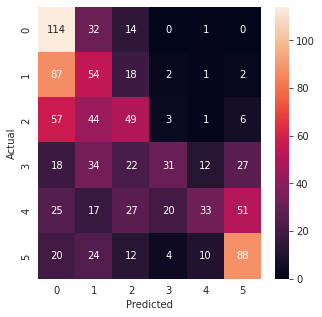

In [ ]:
report_knn_pred=functions.evaluate(y_test, y_pred_knn_opt)
report_knn_pred
functions.accuracy_conf_mat(y_test, y_pred_knn_opt)

In [ ]:
report['KNN (spacy tokenizer)']=report_knn_pred

In [ ]:
report

,Logistic Regression,RIDGE (spacy tokenizer),KNN (spacy tokenizer)
Accuracy Score,0.477083,0.464583,0.384375
Precision Score,0.476181,0.465945,0.425834
Recall Score,0.477656,0.464762,0.384431
F1 Score,0.474729,0.461918,0.368329


###5.4 Decision Tree Classifier

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier()

pipe_tree = Pipeline([('vectorizer', tfidf),
                 ('classifier', tree)])

pipe_tree.fit(X_train, y_train)

y_pred_tree = pipe_tree.predict(X_test)

In [ ]:
#Import
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
grid = {'max_depth':np.arange(1,20)}

#tfidf is defined in the model logistic regression 

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, grid, cv=5)

pipe_tree_cv = Pipeline([('vectorizer', tfidf),
                 ('classifier', tree_cv)])
pipe_tree_cv.fit(X_train, y_train)

# Print results
pipe_tree_cv_best_params=tree_cv.best_params_

print("Hyperparameters:", tree_cv.best_params_)

Hyperparameters: {'max_depth': 7}


In [ ]:
best_param_tree = pipe_tree_cv_best_params['max_depth']


In [ ]:
tree_opt = DecisionTreeClassifier(max_depth=best_param_tree)

pipe_tree_opt = Pipeline([('vectorizer', tfidf),
                 ('classifier', tree_opt)])

pipe_tree_opt.fit(X_train, y_train)

y_pred_tree_opt = pipe_tree_opt.predict(X_test)

0.3312


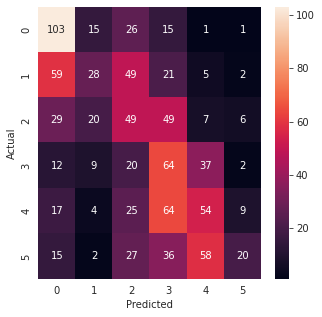

In [ ]:
report_tree_pred=functions.evaluate(y_test, y_pred_tree_opt)
report_tree_pred
functions.accuracy_conf_mat(y_test, y_pred_tree_opt)

In [ ]:
#Define a new column in the raport
report['Decision Tree (spacy tokenizer)']=report_tree_pred

In [ ]:
report

,Logistic Regression,RIDGE (spacy tokenizer),KNN (spacy tokenizer),Decision Tree (spacy tokenizer)
Accuracy Score,0.477083,0.464583,0.384375,0.331250
Precision Score,0.476181,0.465945,0.425834,0.356272
Recall Score,0.477656,0.464762,0.384431,0.333316
F1 Score,0.474729,0.461918,0.368329,0.312833


---

### 5.5 Random Forest Classifier 
Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#tfidf is defined in the model logistic regression 

rfc = RandomForestClassifier()

grid = {'max_depth':np.arange(1,50)}

rfc_cv = GridSearchCV(rfc, grid, cv=5)

pipe_rfc_cv = Pipeline([('vectorizer', tfidf),
                 ('classifier', rfc_cv)])

pipe_rfc_cv.fit(X_train, y_train)

# Print results
pipe_rfc_cv_best_params=rfc_cv.best_params_

# Print results
print("Hyperparameters:", rfc_cv.best_params_)

Hyperparameters: {'max_depth': 47}


In [ ]:
best_param_rfc = pipe_rfc_cv_best_params['max_depth']


0.4052


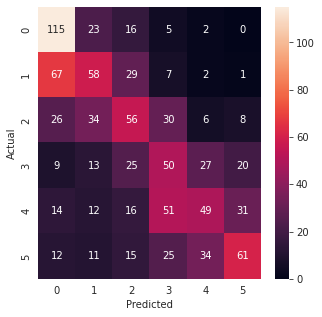

In [ ]:
rfc_opt = RandomForestClassifier(max_depth=best_param_rfc)

pipe_rfc_opt = Pipeline([('vectorizer', tfidf),
                 ('classifier', rfc_opt)])

pipe_rfc_opt.fit(X_train, y_train)

y_pred_rfc_opt = pipe_rfc_opt.predict(X_test)

report_rfc_pred=functions.evaluate(y_test, y_pred_rfc_opt)
report_rfc_pred
functions.accuracy_conf_mat(y_test, y_pred_rfc_opt)

In [ ]:
report['Random Forest Classifier (ST)']=report_rfc_pred

In [ ]:
report

,Logistic Regression,RIDGE (spacy tokenizer),KNN (spacy tokenizer),Decision Tree (spacy tokenizer),Random Forest Classifier (ST)
Accuracy Score,0.477083,0.464583,0.384375,0.331250,0.405208
Precision Score,0.476181,0.465945,0.425834,0.356272,0.404022
Recall Score,0.477656,0.464762,0.384431,0.333316,0.405747
F1 Score,0.474729,0.461918,0.368329,0.312833,0.397189


#6 Using the best model and try other tokenizer 


Looking at the report of all the accuracy scores, the Logistic-Regression has the highest value. For that we try two different tokanizers on the model, to see if it changes something: NLTK and GTP2 tokenizer. 

####6.1 NLTK Tokanizer in Logistic regression

In [ ]:
pattern = re.compile( """[\.\!\"\s\?\-\,\']+""", re.M).split

In [ ]:
tfidf_vector = TfidfVectorizer(tokenizer=pattern, ngram_range=(1,1))

# Create pipeline
pipe_nltk_logreg = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', logreg)])

# Fit model on training set
pipe_nltk_logreg.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<built-in method split of re.Pattern object at 0x7f4e7d3d6850>)),
                ('classifier',
                 LogisticRegression(multi_class='multinomial',
                                    random_state=0))])

In [ ]:
y_pred_logreg_nltk=pipe_nltk_logreg.predict(X_test)

0.4927


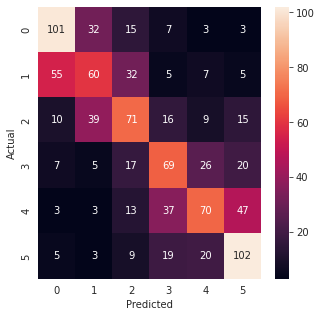

In [ ]:
report_logreg_nltk_pred=functions.evaluate(y_test, y_pred_logreg_nltk)
report_logreg_nltk_pred
functions.accuracy_conf_mat(y_test, y_pred_logreg_nltk)

In [ ]:
report_logreg['NLTK']=report_logreg_nltk_pred

####GTP2 Tokenizer in Logistic Regression

In [ ]:
tfidf_vector = TfidfVectorizer(tokenizer=tokenizer_gpt2, ngram_range=(1,1))

# Create pipeline
pipe_gtp2_logreg = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', logreg)])

# Fit model on training set
pipe_gtp2_logreg.fit(X_train, y_train)


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=PreTrainedTokenizerFast(name_or_path='dbddv01/gpt2-french-small', vocab_size=50257, model_max_len=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': '<|endoftext|>'}))),
                ('classifier',
                 LogisticRegression(multi_class='multinomial',
                                    random_state=0))])

In [ ]:
y_pred_logreg_gtp2 = pipe_gtp2_logreg.predict(X_test)

0.4771


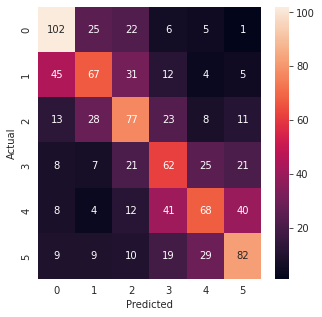

In [ ]:
report_logreg_gtp2_pred=functions.evaluate(y_test, y_pred_logreg)
report_logreg_gtp2_pred
functions.accuracy_conf_mat(y_test, y_pred_logreg)

In [ ]:
report_logreg['GTP2']=report_logreg_gtp2_pred

#7 Show a summary of your results

In the summry the different Scores are shown summarized in a table and visualized in a Bar-Chart. In cleaned Data Models with the spacy tokanizer <font color=#FF0000>the best score got the **Logistic Regression Model**</font>. Thats why several different tokenizer has been tried on that Model as shown in 7.2. 

###7.1 Report of different models with spacy tokenizer

In [ ]:
report

,Logistic Regression,RIDGE (spacy tokenizer),KNN (spacy tokenizer),Decision Tree (spacy tokenizer),Random Forest Classifier (ST)
Accuracy Score,0.477083,0.464583,0.384375,0.331250,0.405208
Precision Score,0.476181,0.465945,0.425834,0.356272,0.404022
Recall Score,0.477656,0.464762,0.384431,0.333316,0.405747
F1 Score,0.474729,0.461918,0.368329,0.312833,0.397189


In [ ]:
report_transposed = report.T

Text(0, 0.5, 'Score')

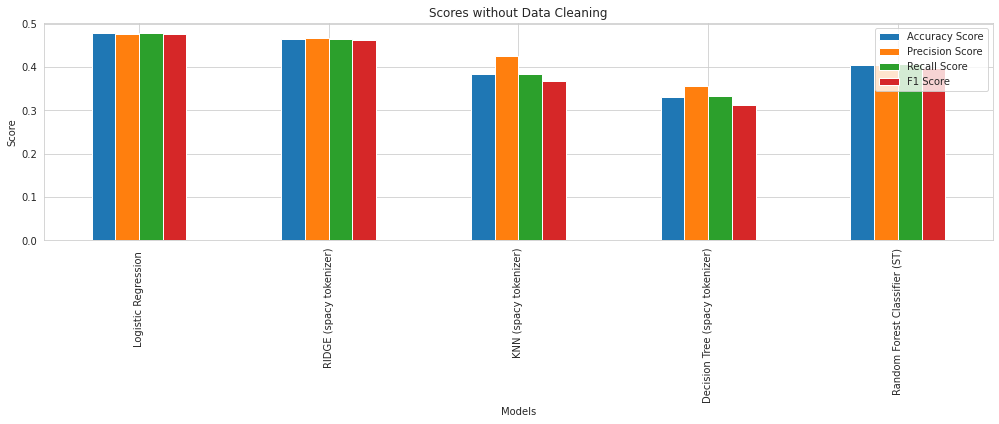

In [ ]:
report_transposed.plot(kind="bar", figsize=(17,4))
plt.title("Scores without Data Cleaning")
plt.xlabel("Models")
plt.ylabel("Score")

###7.2 Report of Logistic Regression with different Tokenizer

Here the Logistic Regression is shown in a table to visualize the differences between the tokenizer. As shown above <font color=#FF0000>the **NLTK tokenizer** results the highest score in the whole Notebook </font>of cleaned data in the classic models.

In [ ]:
report_logreg

,Spacy Tokenizer,NLTK,GTP2
Accuracy Score,0.477083,0.492708,0.477083
Precision Score,0.476181,0.488921,0.476181
Recall Score,0.477656,0.494382,0.477656
F1 Score,0.474729,0.488800,0.474729


In [ ]:
report_logreg_transposed = report_logreg.T

Text(0, 0.5, 'Score')

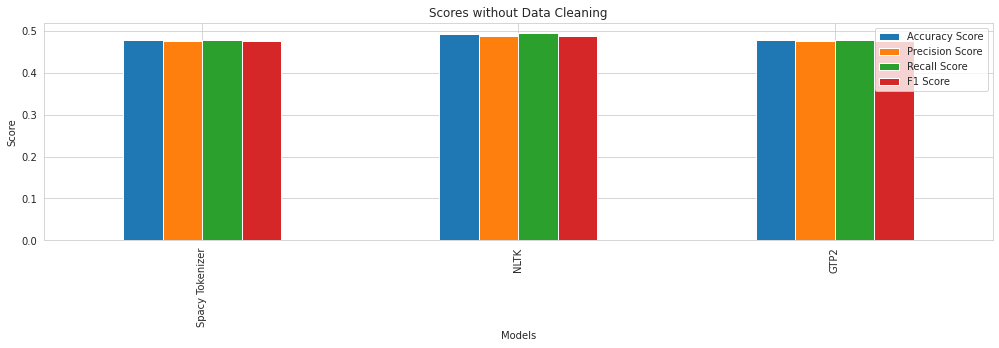

In [ ]:
report_logreg_transposed.plot(kind="bar", figsize=(17,4))
plt.title("Scores without Data Cleaning")
plt.xlabel("Models")
plt.ylabel("Score")